In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
!pip install mlxtend





C:\Users\NM TRADERS\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
!pip install skimpy

  Obtaining dependency information for skimpy from https://files.pythonhosted.org/packages/15/b7/6f154821cfbf5c36d042dbde5ab853cda2a57827d53a9fe09d54bde5b7da/skimpy-0.0.14-py3-none-any.whl.metadata
  Using cached skimpy-0.0.14-py3-none-any.whl.metadata (28 kB)
  Obtaining dependency information for quartodoc<0.8.0,>=0.7.2 from https://files.pythonhosted.org/packages/c1/cb/4fee7ac58adc1eb4a4bf1978f109a2669172a1a5ac2236ab22405e915000/quartodoc-0.7.2-py3-none-any.whl.metadata
  Using cached quartodoc-0.7.2-py3-none-any.whl.metadata (7.1 kB)
  Obtaining dependency information for plum-dispatch>2.0.0 from https://files.pythonhosted.org/packages/74/e3/b1b6ae55d4b18071dd8096c40d2fbe548feb0e9c5e2f7cb37c4a94890ced/plum_dispatch-2.3.2-py3-none-any.whl.metadata
  Using cached plum_dispatch-2.3.2-py3-none-any.whl.metadata (4.4 kB)
Using cached skimpy-0.0.14-py3-none-any.whl (16 kB)
Using cached quartodoc-0.7.2-py3-none-any.whl (77 kB)
Using cached plum_dispatch-2.3.2-py3-none-any.whl (37 kB)


In [3]:
pip show skimpy


Name: skimpy
Version: 0.0.14
Summary: skimpy
Home-page: https://aeturrell.github.io/skimpy/
Author: Arthur Turrell
Author-email: 
License: MIT
Location: C:\Users\NM TRADERS\anaconda3\Lib\site-packages
Requires: click, ipykernel, numpy, pandas, polars, pyarrow, Pygments, quartodoc, rich, typeguard
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [4]:
import skimpy as sk


In [12]:
df = pd.read_csv('insurance_data.csv')


In [13]:
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes


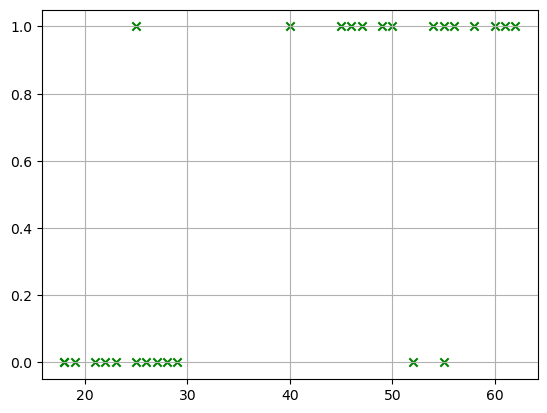

In [15]:
plt.scatter(df.age,df.bought_insurance,marker='x',color='green')
plt.grid()
plt.show()

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)


In [18]:
X_test

,age
22,40
6,55
19,18
7,60
1,25
13,29


In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [20]:
model.fit(X_train, y_train)


LogisticRegression()

In [21]:
X_test

,age
22,40
6,55
19,18
7,60
1,25
13,29


In [22]:
y_predicted = model.predict(X_test)


In [23]:
model.predict_proba(X_test)


array([[0.3658053 , 0.6341947 ],
       [0.05246032, 0.94753968],
       [0.94719815, 0.05280185],
       [0.02472276, 0.97527724],
       [0.85733165, 0.14266835],
       [0.7628473 , 0.2371527 ]])

In [24]:
model.score(X_test,y_test)


0.8333333333333334

In [25]:
y_predicted


array([1, 1, 0, 1, 0, 0], dtype=int64)

In [26]:
X_test


,age
22,40
6,55
19,18
7,60
1,25
13,29


In [27]:
model.coef_



array([[0.15623713]])

In [28]:
model.intercept_


array([-5.69923042])

In [29]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [30]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [31]:
age = 36.4
prediction_function(age)

0.4997000000359999

In [32]:
age = 43
prediction_function(age)

0.568565299077705

In [5]:
df1 = sns.load_dataset("titanic")

In [6]:
df1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
df1.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df1.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
439,0,2,male,31.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
395,0,3,male,22.0,0,0,7.7958,S,Third,man,True,NaN,Southampton,no,True
684,0,2,male,60.0,1,1,39.0000,S,Second,man,True,NaN,Southampton,no,False
204,1,3,male,18.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,yes,True
719,0,3,male,33.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True


In [10]:
df1.head(6)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True


In [11]:
sk.skim(df1)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 891    │ │ string      │ 5     │ │ class                 │                                │
│ │ Number of columns │ 15     │ │ int32       │ 4     │ │ deck                  │                                │
│ └───────────────────┴────────┘ │ float64     │ 2     │ └───────────────────────┘                                │
│                                │ category    │ 2     │                                                          │
│                                │ bool        │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA    ┃ NA %     ┃ mean    ┃ sd     ┃ p0     ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ survived         │     0 │        0 │    0.38 │   0.49 │      0 │     0 │     0 │     1 │      1 │ ▇    ▅  │  │
│ │ pclass           │     0 │        0 │     2.3 │   0.84 │      1 │     2 │     3 │     3 │      3 │ ▃  ▃ ▇  │  │
│ │ age              │   177 │    19.87 │      30 │     15 │   0.42 │    20 │    28 │    38 │     80 │  ▂▇▇▃▁  │  │
│ │ sibsp            │     0 │        0 │    0.52 │    1.1 │      0 │     0 │     0 │     1 │      8 │    ▇    │  │
│ │ parch            │     0 │        0 │    0.38 │   0.81 │      0 │     0 │     0 │     0 │      6 │   ▇▁▁   │  │
│ │ fare             │     0 │        0 │      32 │     50 │      0 │   7.9 │    14 │    31 │    510 │    ▇    │  │
│ └──────────────────┴───────┴──────────┴─────────┴────────┴────────┴───────┴───────┴───────┴────────┴─────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                     ┃ NA          ┃ NA %            ┃ ordered              ┃ unique            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩  │
│ │ class                           │           0 │               0 │ False                │                 3 │  │
│ │ deck                            │         688 │           77.22 │ False                │                 8 │  │
│ └─────────────────────────────────┴─────────────┴─────────────────┴──────────────────────┴───────────────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ true            ┃ true rate                     ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ adult_male                         │             537 │                           0.6 │       ▅    ▇        │  │
│ │ alone                              │             537

In [33]:
df1.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [34]:
df1.columns.values

array(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'], dtype=object)

In [35]:
df1.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [36]:
df1.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [38]:
df1.drop("deck", axis=1,inplace=True)

In [39]:
df1["age"].fillna(df1["age"].median(),inplace=True)

C:\Users\NM TRADERS\AppData\Local\Temp\ipykernel_15004\469886968.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["age"].fillna(df1["age"].median(),inplace=True)


In [40]:
df1["fare"].fillna(df1["fare"].median(), inplace=True)

C:\Users\NM TRADERS\AppData\Local\Temp\ipykernel_15004\4245099918.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["fare"].fillna(df1["fare"].median(), inplace=True)


In [42]:
df1["embark_town"].fillna(df1["embark_town"].mode()[0],inplace=True)
df1["embarked"].fillna(df1["embarked"].mode()[0],inplace=True)


C:\Users\NM TRADERS\AppData\Local\Temp\ipykernel_15004\3674892306.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["embarked"].fillna(df1["embarked"].mode()[0],inplace=True)


In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [49]:
from sklearn.preprocessing import LabelEncoder


In [50]:
for col in df1.columns:
    if df1[col].dtype == 'object' or df1[col].dtype.name == 'category':
        df1[col] = LabelEncoder().fit_transform(df1[col])

In [52]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [53]:
# X and y column
X = df1.drop('survived', axis=1)
y = df1['survived']

In [55]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [56]:
# train the model
model.fit(X_train, y_train)

C:\Users\NM TRADERS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
# predict the values
y_pred = model.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report


In [60]:
# evaluate the model
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy Score:  1.0
Recall Score:  1.0
Precision Score:  1.0
F1 Score:  1.0
Confusion Matrix: 
 [[117   0]
 [  0  62]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00        62

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Text(95.72222222222221, 0.5, 'Actual')

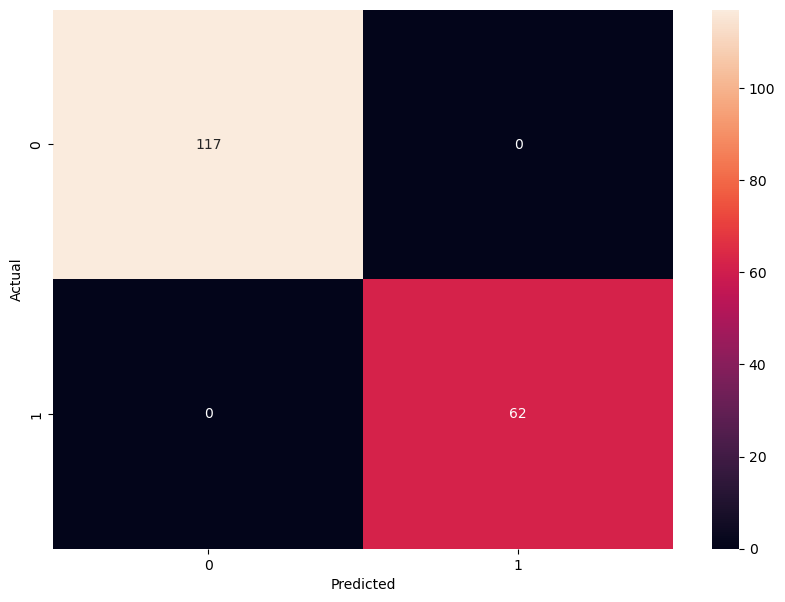

In [61]:
# plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')